In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    '''
    Utiliza Pandas para importar los datos de epa-sea-level.csv.
Usa matplotlib para crear un diagrama de dispersión usando la columna 
"Year" como el eje x y la columna "CSIRO Adjusted Sea Level" como el eje y.
    '''
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')
    #print(df.head())

    # Create scatter plot
    fig, ax = plt.subplots()
    ax.scatter(df.Year, df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
    '''
    Usa la función linregress de scipy.stats para obtener la pendiente e intersección con el 
    eje y de la línea de mejor encaje. Dibuja la línea de mejor encaje sobre el diagrama de dispersión.
    Haz que la línea pase por el año 2050 para predecir el aumento del nivel del mar en ese año.
    '''
    x = df.Year
    y = df['CSIRO Adjusted Sea Level']
    res = linregress(x,y)
    pos = x.index[-1]
    x[pos +1 ]= 2050
    ax.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

    # Create second line of best fit
    '''
    Traza una nueva línea de mejor encaje utilizando datos del año 2000 hasta el año más reciente del 
    conjunto de datos. Haz que la línea pase también por el año 2050 para predecir la subida del nivel 
    del mar en 2050 si el ritmo de subida continúa como desde el año 2000.
    '''
    df_2000 = df[df.Year >= 2000]
    df_2000.reset_index(drop=True, inplace=True)
    x_2000 = df_2000.Year
    y_2000 = df_2000['CSIRO Adjusted Sea Level']
    #print(len(y_2000), len(x_2000))
    res_2000 = linregress(x_2000,y_2000)
    pos_2000 = x_2000.index[-1]
    #print(pos_2000)
    x_2000[pos_2000 +1 ]= 2050
    ax.plot(x_2000, res_2000.intercept + res_2000.slope*x_2000, 'r', label='fitted line 2000')

    # Add labels and title
    '''
    La etiqueta del eje x debe ser "Year", la etiqueta del eje y debe ser "Sea Level (inches)",
    y el título debe ser "Rise in Sea Level"
    '''
    ax.set(title='Rise in Sea Level', xlabel='Year', ylabel='Sea Level (inches)')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    #plt.savefig('sea_level_plot.png')
    return plt.gca()

/tmp/ipykernel_78350/2745666865.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[pos +1 ]= 2050
/tmp/ipykernel_78350/2745666865.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_2000[pos_2000 +1 ]= 2050


<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

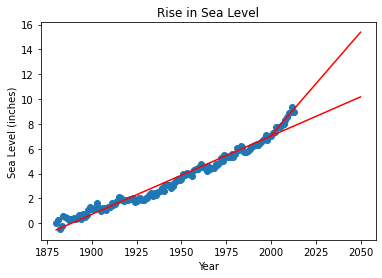

In [75]:
draw_plot()

In [14]:
df= pd.read_csv('epa-sea-level.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [12]:
df.Year.append(2052)

/tmp/ipykernel_78350/2127566137.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.Year.append(2052)


TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

In [26]:
x = df.Year
pos = x.index[-1]
x[pos +1 ]= 2050

/tmp/ipykernel_78350/2448408551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[pos +1 ]= 2050


In [27]:
x

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
130    2010
131    2011
132    2012
133    2013
134    2050
Name: Year, Length: 135, dtype: int64

In [39]:
df_2000 = df[df.Year >= 2000]

In [40]:
df_2000.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
